# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


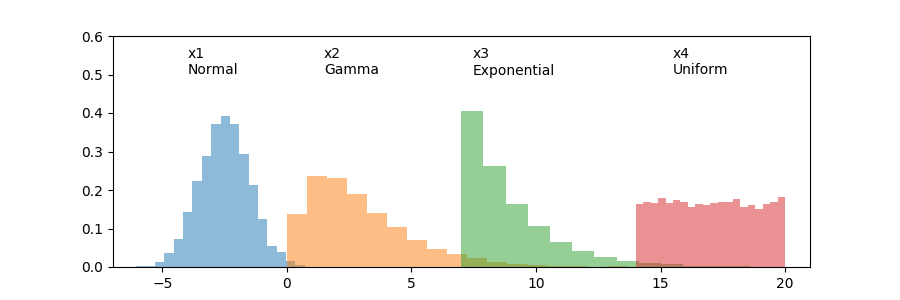

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>


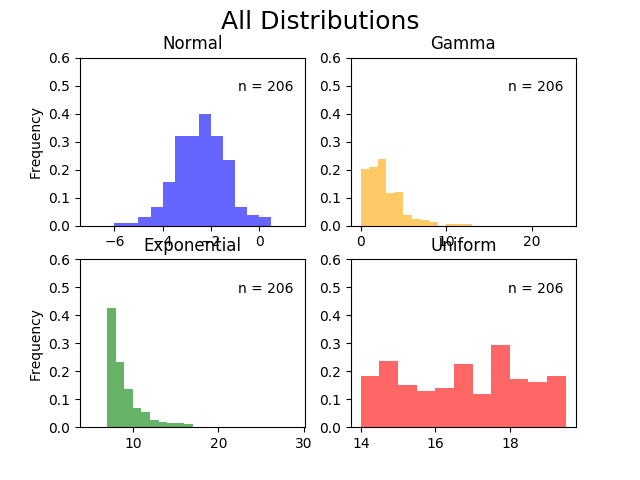

In [2]:
import matplotlib.animation as animation
n = 1000
dist = [x1, x2, x3, x4]
bins = [np.arange(-7,2,0.5),np.arange(0,25,1),np.arange(5,30,1), np.arange(14,20,0.5)]
colors = ["blue", "orange" , "green", "red"]
names = ["Normal", "Gamma", "Exponential", "Uniform"]
freq = ["Frequency","","Frequency",""]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
plt.suptitle("All Distributions", fontsize=18)


def update(curr):
    if curr == n:
        a.event_source.stop()
    if curr>=100:
        for ax, j in zip(plt.gcf().get_axes(), [0,1,2,3]):
            ax.cla()
            ax.hist(dist[j][:curr], normed=True, color=colors[j], bins=bins[j], alpha=0.6)
            ax.set_ylim([0,0.60])
            ax.set_title(names[j])
            ax.set_ylabel(freq[j])
            ax.annotate('n = {}'.format(curr), xy=(0.5,0.8), xycoords = 'axes fraction', xytext =(0.7,0.8), textcoords ='axes fraction')
             
a = animation.FuncAnimation(fig, update, interval=20)

<IPython.core.display.Javascript object>


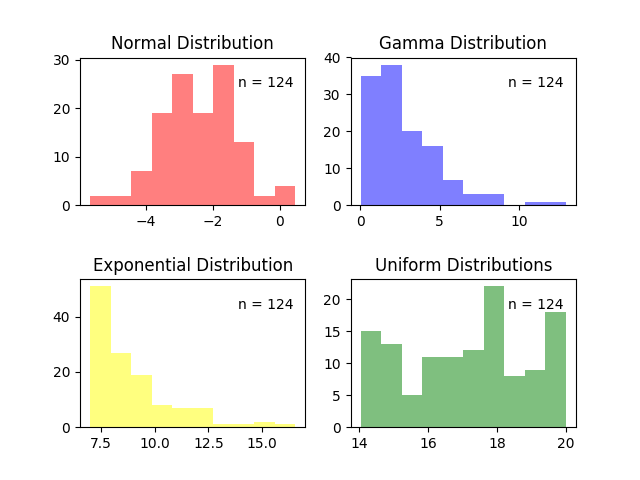

In [5]:
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation

fig = plt.figure()
gspec = gridspec.GridSpec(2,2)
top_left_histogram = plt.subplot(gspec[0,0])
top_right_histogram = plt.subplot(gspec[0,1])
bottom_left_histogram = plt.subplot(gspec[1, 0])
bottom_right_histogram = plt.subplot(gspec[1, 1])
gspec.update(hspace=0.5)
#bins = [np.arange(-7,2,0.5),np.arange(0,25,1),np.arange(5,30,1), np.arange(14,20,0.5)]
n = 200

def update(curr):
    if curr == n:
        a.event_source.stop()
    if curr >= 100:
        top_left_histogram.cla()
        top_right_histogram.cla()
        bottom_left_histogram.cla()
        bottom_right_histogram.cla()
        bins = np.arange(-5, 10, 0.5)
        top_left_histogram.hist(x1[:curr], bins=10, color="red", alpha=0.5)
        top_left_histogram.set_title("Normal Distribution")
        top_left_histogram.annotate('n = {}'.format(curr), xy=(0.5,0.8), xycoords = 'axes fraction', xytext =(0.7,0.8), textcoords ='axes fraction')
        top_right_histogram.hist(x2[:curr], bins=10, color="blue", alpha=0.5)
        top_right_histogram.set_title("Gamma Distribution")
        top_right_histogram.annotate('n = {}'.format(curr), xy=(0.5,0.8), xycoords = 'axes fraction', xytext =(0.7,0.8), textcoords ='axes fraction')
        bottom_left_histogram.hist(x3[:curr], bins=10, color="yellow", alpha=0.5)
        bottom_left_histogram.set_title("Exponential Distribution")
        bottom_left_histogram.annotate('n = {}'.format(curr), xy=(0.5,0.8), xycoords = 'axes fraction', xytext =(0.7,0.8), textcoords ='axes fraction')
        bottom_right_histogram.hist(x4[:curr], bins = 10, color="green", alpha=0.5)
        bottom_right_histogram.set_title("Uniform Distributions")
        bottom_right_histogram.annotate('n = {}'.format(curr), xy=(0.5,0.8), xycoords = 'axes fraction', xytext =(0.7,0.8), textcoords ='axes fraction')
    

a = animation.FuncAnimation(fig, update, interval=50)    
